In [2]:
import numpy as np 
import pickle
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def clean_roi(roi_vals, roi_labels):
    roi_vals = roi_vals.reshape((len(roi_vals), ))
    final_roi_labels = []
    for val_index in roi_vals:
        if val_index == 0:
            final_roi_labels.append("other")
        else:
            final_roi_labels.append(roi_labels[val_index-1][0][0])
    return final_roi_labels

def clean_atlas(atlas_vals, atlas_labels):
    at_vals = atlas_vals.reshape((len(atlas_vals), ))
    at_labels = []
    for val_index in at_vals:
        at_labels.append(atlas_labels[val_index-1][0][0])
    return at_labels

In [4]:
# get residuals
residual_file = "../residuals/concatenated_all_residuals.p"
all_residuals = pickle.load( open( residual_file, "rb" ) )

# get atlas and roi
atlas_vals = pickle.load( open( "atlas_vals.p", "rb" ) )
atlas_labels = pickle.load( open( "atlas_labels.p", "rb" ) )
roi_vals = pickle.load( open( "roi_vals.p", "rb" ) )
roi_labels = pickle.load( open( "roi_labels.p", "rb" ) )

final_roi_labels = clean_roi(roi_vals, roi_labels)
at_labels = clean_atlas(atlas_vals, atlas_labels)

# make dataframe
df_dict = {'voxel_index': list(range(len(all_residuals))), 
        'residuals': all_residuals, 
        'atlas_labels': at_labels, 
        'roi_labels': final_roi_labels}

df = pd.DataFrame(df_dict)

In [5]:
df.head()

,atlas_labels,residuals,roi_labels,voxel_index
0,Cerebelum_8_L,5.530148e-12,other,0
1,Cerebelum_7b_L,5.547563e-12,other,1
2,Cerebelum_8_R,5.181878e-12,other,2
3,Cerebelum_8_L,5.271514e-12,other,3
4,Cerebelum_8_L,5.446057e-12,other,4


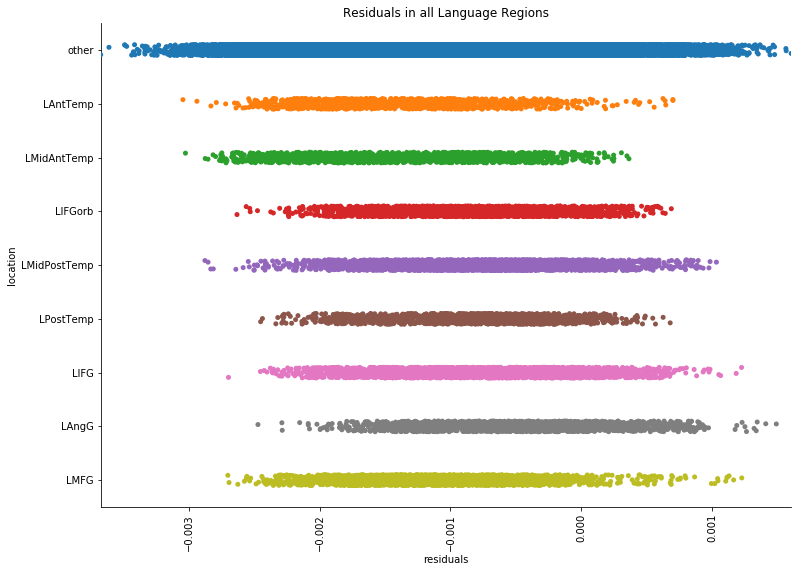

In [6]:
%matplotlib inline
g = sns.catplot(x="residuals", y="roi_labels", data=df, height=7.5, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlim=(min(all_residuals), max(all_residuals)))
g.set_axis_labels("residuals", "location")
plt.title("Residuals in all Language Regions")
plt.savefig("roi.png")
plt.show()

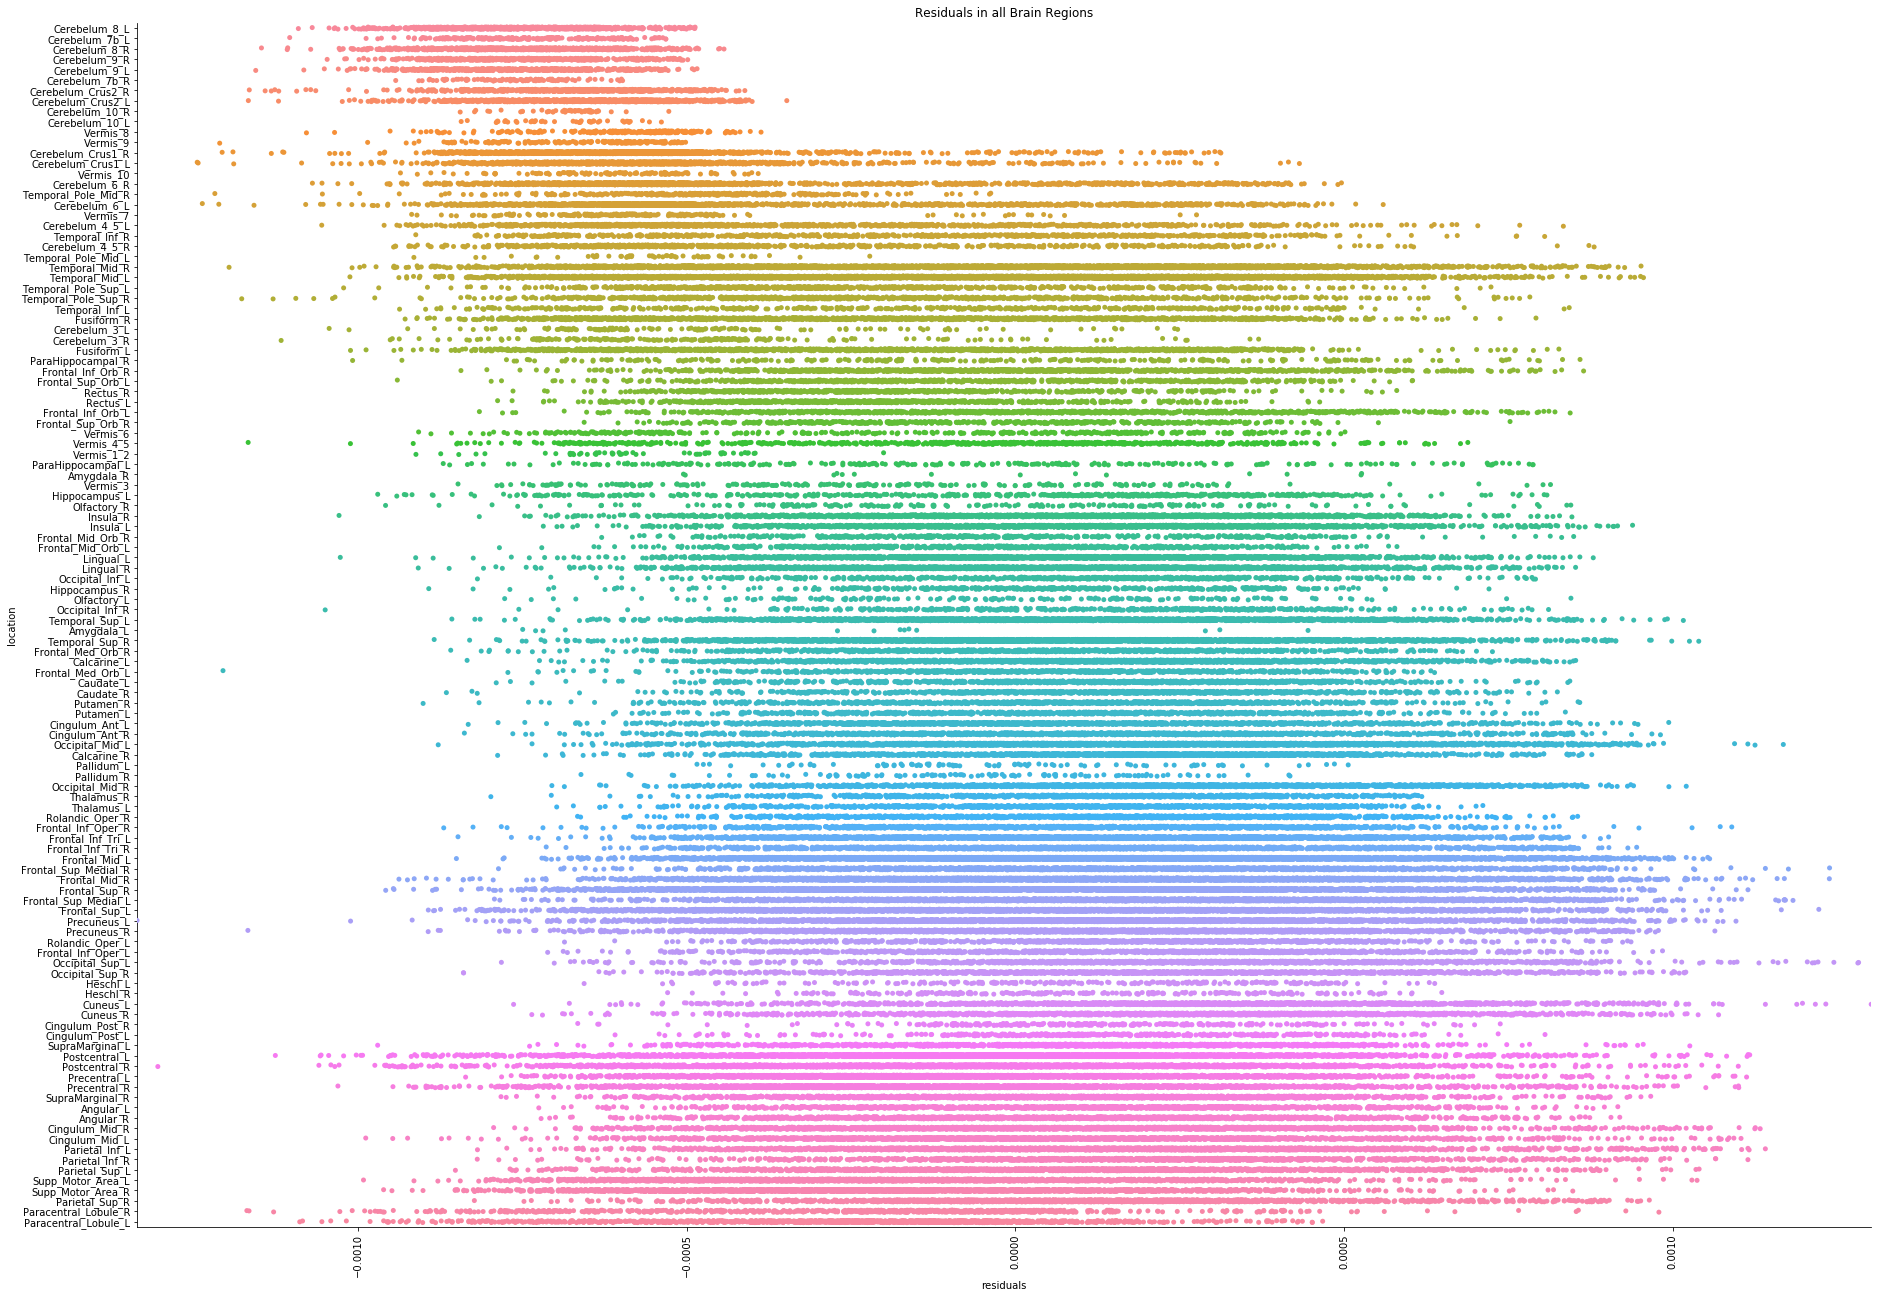

In [34]:
g = sns.catplot(x="residuals", y="atlas_labels", data=df, height=17.5, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlim=(min(all_residuals), max(all_residuals)))
g.set_axis_labels("residuals", "location")
plt.title("Residuals in all Brain Regions")
plt.savefig("atlas.png")
plt.show()

In [7]:
min(all_residuals)

1.6385860132508658e-12

In [8]:
max(all_residuals)

2.8020124515137374e-11